In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('../Datasets/cpdata.csv')

In [3]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.size

15500

In [5]:
df.shape

(3100, 5)

In [6]:
df.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

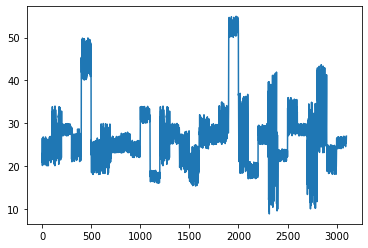

In [7]:
sns.lineplot(data = df['temperature'])

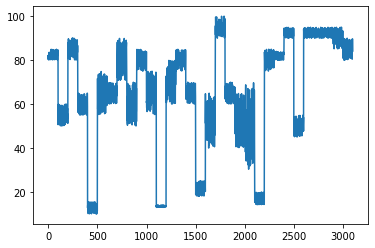

In [8]:
sns.lineplot(data = df['humidity'])

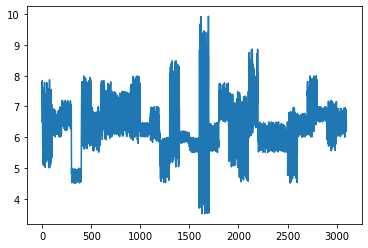

In [9]:
sns.lineplot(data = df['ph'])

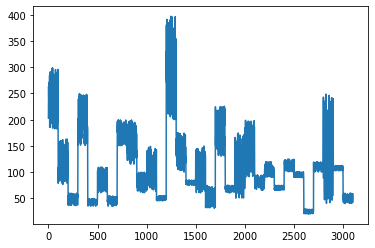

In [10]:
sns.lineplot(data = df['rainfall'])

In [54]:
df['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [11]:
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
df['label'] = df['label'].astype('category').cat.codes
labels = df['label']
acc = []
model = []
print(labels)

0       28
1       28
2       28
3       28
4       28
        ..
3095    29
3096    29
3097    29
3098    29
3099    29
Name: label, Length: 3100, dtype: int8


In [12]:
print(labels.unique())
print(df['label'].unique())

[28 30 11 16 23 21  9  7  4  5  6 12 14 15 17  8 10  3  1  0 13  2 19 20
 18 22 24 25 26 27 29]
[28 30 11 16 23 21  9  7  4  5  6 12 14 15 17  8 10  3  1  0 13  2 19 20
 18 22 24 25 26 27 29]


In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels,test_size = 0.2,random_state =2)

# Decision Tree

In [14]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

df = pd.read_csv('../Datasets/cpdata.csv')
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels,test_size = 0.2,random_state =2)

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=10)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.8983870967741936
              precision    recall  f1-score   support

Adzuki Beans       1.00      0.89      0.94        19
  Black gram       1.00      0.95      0.98        21
    Chickpea       0.96      1.00      0.98        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.88      1.00      0.94        15
      Cotton       0.87      0.87      0.87        15
  Ground Nut       0.86      0.95      0.90        19
        Jute       0.86      0.95      0.90        19
Kidney Beans       1.00      0.94      0.97        17
      Lentil       0.86      0.95      0.90        19
  Moth Beans       0.90      0.78      0.84        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.80      0.52      0.63        23
      Rubber       0.88      0.92      0.90        24
   Sugarcane       0.91      0.71      0.80        14
         Tea       0.76      0.8

# Naive Bayes

In [15]:
from __future__ import print_function
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics

df = pd.read_csv('../Datasets/cpdata.csv')
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.932258064516129
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       1.00      1.00      1.00        21
    Chickpea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.79      0.73      0.76        15
      Cotton       0.86      0.80      0.83        15
  Ground Nut       0.95      1.00      0.97        19
        Jute       0.85      0.89      0.87        19
Kidney Beans       1.00      1.00      1.00        17
      Lentil       0.95      1.00      0.97        19
  Moth Beans       1.00      0.91      0.95        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.94      0.74      0.83        23
      Rubber       0.96      0.92      0.94        24
   Sugarcane       0.92      0.86      0.89        14
         Tea       0.95      1.00  

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# SVM

In [17]:
from __future__ import print_function
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics

df = pd.read_csv('../Datasets/cpdata.csv')
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels,test_size = 0.2,random_state =2)

from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.6774193548387096
              precision    recall  f1-score   support

Adzuki Beans       1.00      0.11      0.19        19
  Black gram       0.81      0.81      0.81        21
    Chickpea       1.00      0.91      0.95        22
     Coconut       1.00      0.70      0.82        20
      Coffee       0.80      0.53      0.64        15
      Cotton       0.80      0.53      0.64        15
  Ground Nut       0.77      0.53      0.62        19
        Jute       0.82      0.74      0.78        19
Kidney Beans       1.00      0.71      0.83        17
      Lentil       0.86      0.63      0.73        19
  Moth Beans       0.90      0.39      0.55        23
   Mung Bean       1.00      0.90      0.95        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.13      0.91      0.23        23
      Rubber       1.00      0.08      0.15        24
   Sugarcane       0.60      0.43      0.50        14
         Tea       0.81      0.68      0.7

# Logistic Regression

In [18]:
from __future__ import print_function
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics

df = pd.read_csv('../Datasets/cpdata.csv')
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,labels,test_size = 0.2,random_state =2)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.5919354838709677


/home/nns/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


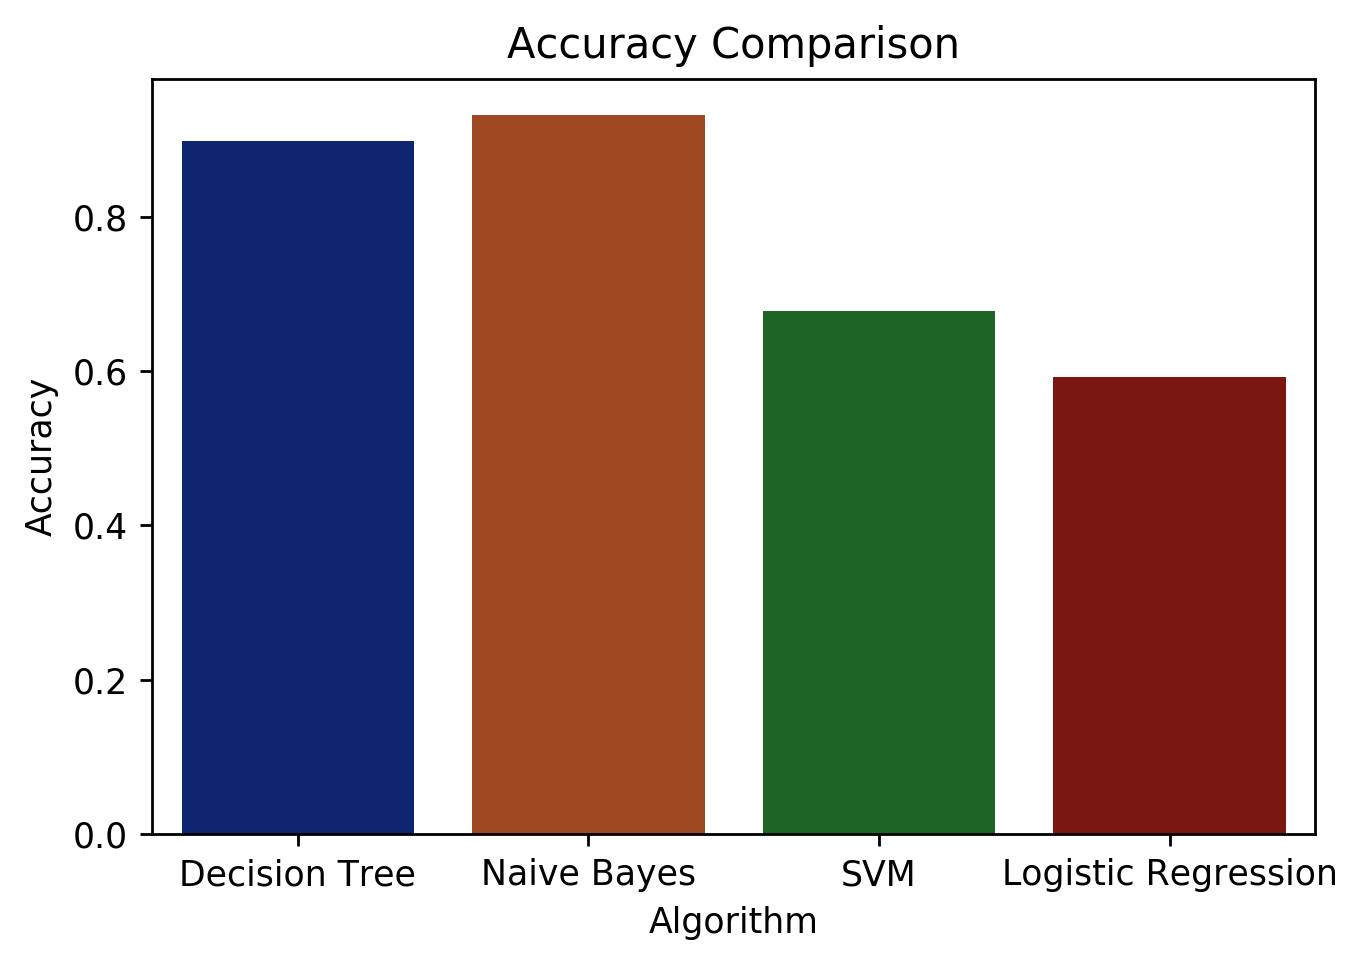

In [19]:
plt.figure(dpi=250)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

# Decision Tree : 90%
# Naive Bayes : 93%
# SVM : 63%
# Logistic Regression : 57%

In [20]:
encoders = [28, 30, 11, 16, 23, 21,  9,  7,  4,  5,  6, 12, 14, 15, 17,  8, 10,
        3,  1,  0, 13,  2, 19, 20, 18, 22, 24, 25, 26, 27, 29]
crop_names =  ['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon']

crop_names = dict(zip(encoders,crop_names))

In [25]:
value = features.iloc[:1]
crop_names = print(NaiveBayes.predict(value)[0])

rice


In [26]:
value

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536


In [53]:
fert = pd.read_csv('../Datasets/Fertilizer.csv')

In [60]:
fert['Crop'].unique()

array(['Rice', 'Jowar(Sorghum)', 'Barley(JAV)', 'Maize',
       'Ragi( naachnnii)', 'Chickpeas(Channa)', 'French Beans(Farasbi)',
       'Fava beans (Papdi - Val)', 'Lima beans(Pavta)',
       'Cluster Beans(Gavar)', 'Soyabean', 'Black eyed beans( chawli)',
       'Kidney beans', 'pigeon peas(Toor Dal)', 'Moth bean(Matki)',
       'Mung beans', 'Green Peas', 'Horse Gram(kulthi)', 'Black Gram',
       'Rapeseed (Mohri)', 'Coriander seeds', 'Mustard seeds',
       'sesame seed', 'Cumin seeds', 'Lentils(Masoor Dal)', 'Brinjal',
       'Beetroot', 'Bitter Gourd', 'Bottle Gourd', 'Capsicum', 'Cabbage',
       'Carrot', 'Cauliflower', 'Cucumber', 'Coriander leaves',
       'Curry leaves', 'Drumstick – moringa', 'Chili', 'Lady Finger',
       'Mushroom', 'Onion', 'Potato', 'Pumpkin', 'Radish', 'Olive',
       'Sweet Potato', 'Fenugreek Leaf(methi)', 'Spinach', 'Ridgegourd',
       'Gooseberry(Amla)', 'Jambun(Syzygium cumini)',
       'Ziziphus mauritiana(Bor)', 'Garcinia indica(kokam)', 'Tama

In [65]:
crop_tmp = ['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon']

In [70]:
print(len(crop_tmp))
print(len(fert['Crop'].unique()))

31
97


In [63]:
notthere = ['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil','Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber', 'Sugarcane','Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut', 'Black gram','Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana', 'grapes', 'apple','mango', 'muskmelon', 'orange', 'papaya', 'pomegranate', 'watermelon']

In [67]:
print(notthere)
print(crop_tmp)

['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil', 'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber', 'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut', 'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana', 'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya', 'pomegranate', 'watermelon']
['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil', 'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber', 'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut', 'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana', 'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya', 'pomegranate', 'watermelon']


In [69]:
rainfall = pd.read_csv('../Datasets/district wise rainfall normal.csv')

In [70]:
rainfall.head()

,STATE_UT_NAME,DISTRICT,1,2,3,4,5,6,7,8,9,10,11,12,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [71]:
rainfall  = rainfall[rainfall['STATE_UT_NAME'] == "KARNATAKA"]

In [72]:
rainfall

,STATE_UT_NAME,DISTRICT,1,2,3,4,5,6,7,8,9,10,11,12,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
596,KARNATAKA,UTTAR KANNADA,0.3,0.1,2.7,22.1,114.0,740.9,1053.8,667.7,258.5,155.1,44.1,11.2,3070.5,0.4,138.8,2720.9,210.4
597,KARNATAKA,DAKSHIN KANDA,1.9,0.7,6.4,39.8,180.9,977.2,1227.2,833.6,313.6,236.9,82.0,15.6,3915.8,2.6,227.1,3351.6,334.5
598,KARNATAKA,UDUPI,1.4,0.4,4.1,29.4,193.8,1081.0,1371.6,902.2,404.9,223.8,74.6,18.8,4306.0,1.8,227.3,3759.7,317.2
599,KARNATAKA,BELGAM,0.7,0.9,6.2,30.2,74.8,130.4,204.0,126.7,113.0,116.6,30.6,5.1,839.2,1.6,111.2,574.1,152.3
600,KARNATAKA,BIDAR,5.9,6.1,10.1,21.7,31.4,137.1,190.7,196.6,170.5,93.5,20.9,6.2,890.7,12.0,63.2,694.9,120.6
601,KARNATAKA,BIJAPUR,2.4,2.7,5.2,20.1,46.5,94.5,91.8,91.3,158.4,111.7,24.9,6.9,656.4,5.1,71.8,436.0,143.5
602,KARNATAKA,DHARWAD,2.3,3.2,6.9,46.6,82.5,113.8,149.1,101.6,119.5,120.4,39.6,6.2,791.7,5.5,136.0,484.0,166.2
603,KARNATAKA,GULBARGA,4.3,2.9,6.2,19.7,36.4,112.8,156.1,167.6,184.0,105.3,20.8,4.5,820.6,7.2,62.3,620.5,130.6
604,KARNATAKA,YADGIR,4.4,3.6,5.2,20.5,36.8,116.8,153.0,161.2,179.8,123.4,24.5,5.3,834.5,8.0,62.5,610.8,153.2
605,KARNATAKA,RAICHUR,1.4,2.0,4.1,17.7,40.5,81.7,110.2,122.2,147.5,110.5,21.4,5.9,665.1,3.4,62.3,461.6,137.8


In [59]:
a = rainfall[rainfall['DISTRICT'] == 'EAST SIANG']

In [60]:
from datetime import datetime 

In [64]:
str(datetime.now().month)

'3'

In [63]:
a['3']

4    105.9
Name: 3, dtype: float64

In [65]:
value = a[str(datetime.now().month)]

In [66]:
print(value[value.index[0]])

105.9


In [5]:
rainfall.STATE_UT_NAME.unique()

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [6]:
rainfall.DISTRICT.unique()

array(['NICOBAR', 'SOUTH ANDAMAN', 'N & M ANDAMAN', 'LOHIT', 'EAST SIANG',
       'SUBANSIRI F.D', 'TIRAP', 'ANJAW (LOHIT)', 'LOWER DIBANG',
       'CHANGLANG', 'PAPUM PARE', 'LOW SUBANSIRI', 'UPPER SIANG',
       'WEST SIANG', 'DIBANG VALLEY', 'WEST KAMENG', 'EAST KAMENG',
       'TAWANG(W KAME', 'KURUNG KUMEY', 'CACHAR', 'DARRANG', 'GOALPARA',
       'KAMRUP', 'LAKHIMPUR', 'NORTH CACHAR', 'NAGAON', 'SIVASAGAR',
       'BARPETA', 'DHUBRI', 'DIBRUGARH', 'JORHAT', 'KARIMGANJ',
       'KOKRAJHAR', 'SHONITPUR', 'GOLAGHAT', 'TINSUKIA', 'HAILAKANDI',
       'DHEMAJI(LAKHI', 'KARBI ANGLONG', 'UDALGURI(DARA', 'KAMRUP METROP',
       'CHIRANG(BONGAI', 'BAKSA BARPETA', 'BONGAIGAON', 'MORIGAON',
       'NALBARI', 'EAST KHASI HI', 'JAINTIA HILLS', 'EAST GARO HIL',
       'RI-BHOI', 'SOUTH GARO HI', 'W KHASI HILL', 'WEST GARO HIL',
       'IMPHAL EAST', 'SENAPATI', 'TAMENGLONG', 'CHANDEL', 'UKHRUL',
       'THOUBAL', 'BISHNUPUR', 'IMPHAL WEST', 'CHURACHANDPUR', 'AIZAWL',
       'CHAMPHAI', 'KOLASI

In [81]:
d = {'temperature':40,'humidity': 22,'ph':  7.5, 'rainfall': 120}

In [82]:
import pandas as pd
temp = pd.DataFrame(columns = ['temperature','humidity','ph','rainfall'])

In [83]:
temp.append(d,ignore_index=True)

,temperature,humidity,ph,rainfall
0,40.0,22.0,7.5,120.0
